In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt 


In [ ]:
import os

folder = "D:/desktop bkp/chest_xray/chest_xray/train/PNEUMONIA"
print(os.listdir(folder))


['.DS_Store', 'person1000_bacteria_2931.jpeg', 'person1000_virus_1681.jpeg', 'person1001_bacteria_2932.jpeg', 'person1002_bacteria_2933.jpeg', 'person1003_bacteria_2934.jpeg', 'person1003_virus_1685.jpeg', 'person1004_bacteria_2935.jpeg', 'person1004_virus_1686.jpeg', 'person1005_bacteria_2936.jpeg', 'person1005_virus_1688.jpeg', 'person1006_bacteria_2937.jpeg', 'person1007_bacteria_2938.jpeg', 'person1007_virus_1690.jpeg', 'person1008_bacteria_2939.jpeg', 'person1008_virus_1691.jpeg', 'person1009_virus_1694.jpeg', 'person100_virus_184.jpeg', 'person1010_bacteria_2941.jpeg', 'person1010_virus_1695.jpeg', 'person1011_bacteria_2942.jpeg', 'person1012_bacteria_2943.jpeg', 'person1014_bacteria_2945.jpeg', 'person1015_virus_1701.jpeg', 'person1015_virus_1702.jpeg', 'person1016_bacteria_2947.jpeg', 'person1016_virus_1704.jpeg', 'person1017_bacteria_2948.jpeg', 'person1018_bacteria_2949.jpeg', 'person1018_virus_1706.jpeg', 'person1019_bacteria_2950.jpeg', 'person1019_virus_1707.jpeg', 'person

In [ ]:
image=PIL.Image.open("D:/desktop bkp/chest_xray/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg")

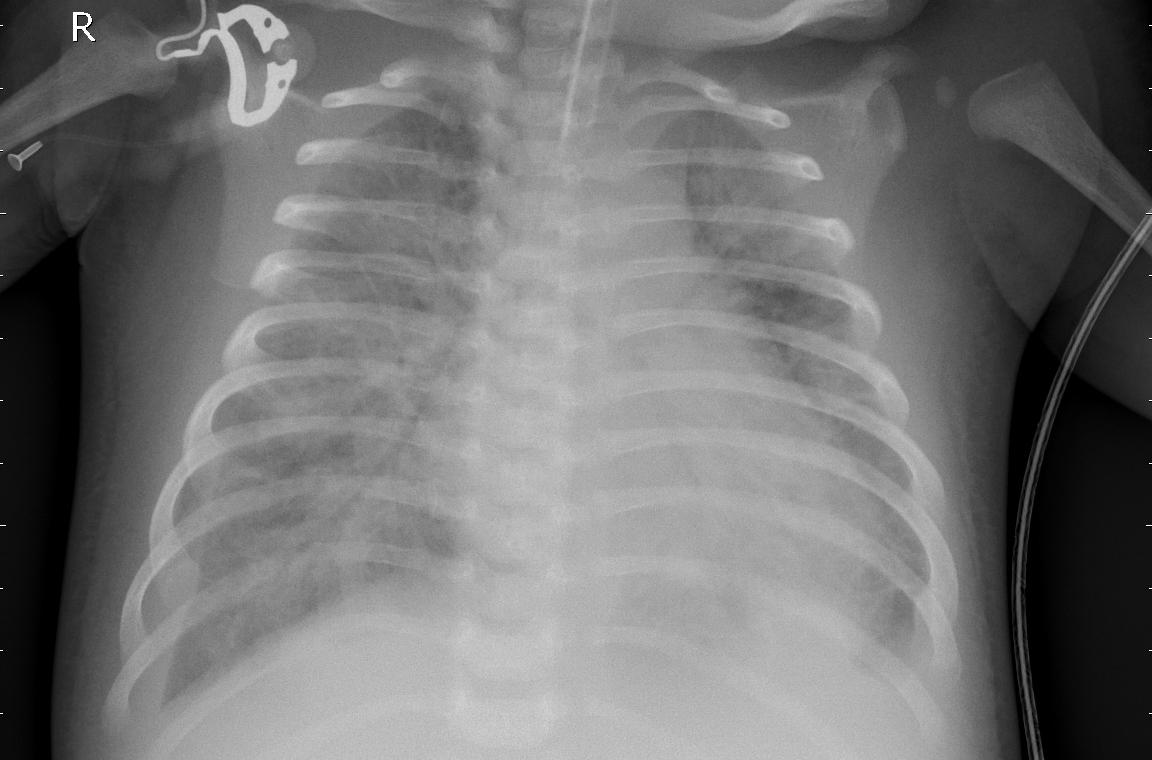

In [12]:
image

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
training_dir='D:/desktop bkp/chest_xray/chest_xray/train'

training_generator=ImageDataGenerator(rescale=1./255)

data_train=training_generator.flow_from_directory(training_dir,target_size=(120,120), class_mode='binary')

Found 5216 images belonging to 2 classes.


In [ ]:
valid_dir='D:/desktop bkp/chest_xray/chest_xray/val'

validation_generator=ImageDataGenerator(rescale=1./255)

data_valid=validation_generator.flow_from_directory(valid_dir,target_size=(120,120), class_mode='binary')

Found 16 images belonging to 2 classes.


In [ ]:
test_dir='D:/desktop bkp/chest_xray/chest_xray/test'

test_generator=ImageDataGenerator(rescale=1./255)

data_test=test_generator.flow_from_directory(test_dir,target_size=(120,120), class_mode='binary')

Found 624 images belonging to 2 classes.


In [ ]:
#CNN

In [19]:
model=tf.keras.Sequential([tf.keras.layers.Conv2D(32,(3,3),input_shape=(120,120,3),activation='relu'),
                         tf.keras.layers.MaxPooling2D(2,2),
                         tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                         tf.keras.layers.MaxPooling2D(2,2),
                         tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                         tf.keras.layers.MaxPooling2D(2,2),
                         tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                         tf.keras.layers.MaxPooling2D(2,2),
                         tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
                         tf.keras.layers.MaxPooling2D(2,2),
                          tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(256,activation='relu'),
                          tf.keras.layers.Dense(1,activation='sigmoid')])

C:\Users\Pratik\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 118, 118, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 57, 57, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,700,161 (6.49 MB)

 Trainable params: 1,700,161 (6.49 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['acc'])

In [22]:
history = model.fit(data_train, epochs=2, validation_data=data_valid)


C:\Users\Pratik\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
163/163 ━━━━━━━━━━━━━━━━━━━━ 655s 4s/step - acc: 0.7306 - loss: 0.5879 - val_acc: 0.6875 - val_loss: 0.6457
Epoch 2/2
163/163 ━━━━━━━━━━━━━━━━━━━━ 449s 3s/step - acc: 0.8708 - loss: 0.3047 - val_acc: 0.8125 - val_loss: 0.6089


In [23]:
model.evaluate(data_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - acc: 0.8482 - loss: 0.3615


[0.3832099437713623, 0.8413461446762085]

In [24]:
prediction=model.predict(data_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


In [25]:
prediction[4]

array([0.98297364], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step


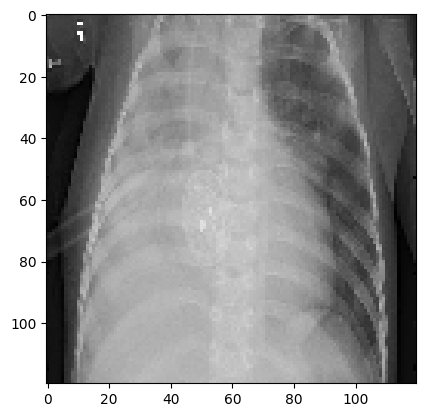

The percentage of pneumonia is: [99.97719]


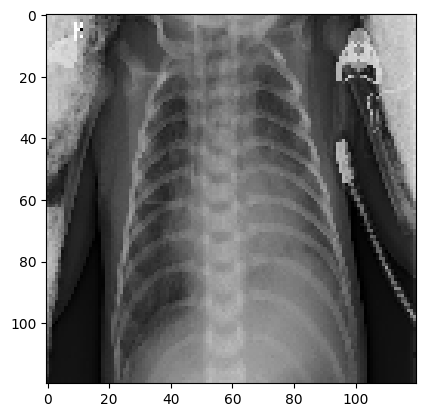

The percentage of pneumonia is: [91.759926]


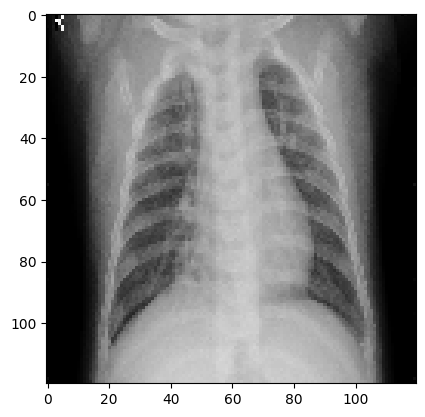

The percentage of pneumonia is: [60.867584]


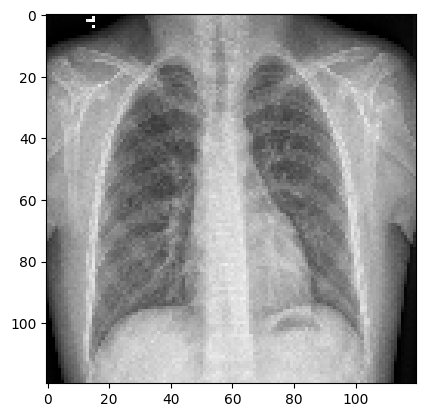

The percentage of pneumonia is: [16.13486]


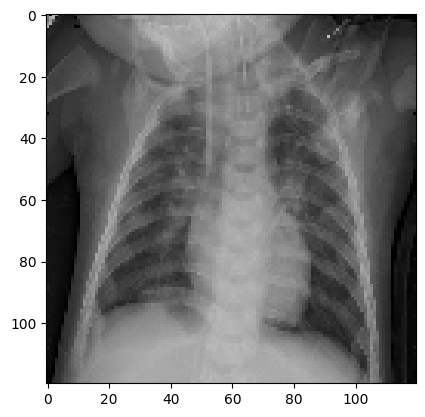

The percentage of pneumonia is: [59.178715]


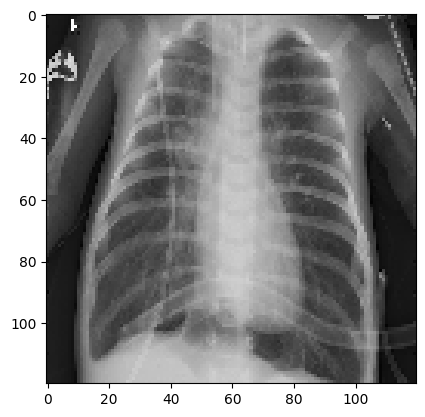

The percentage of pneumonia is: [99.953285]


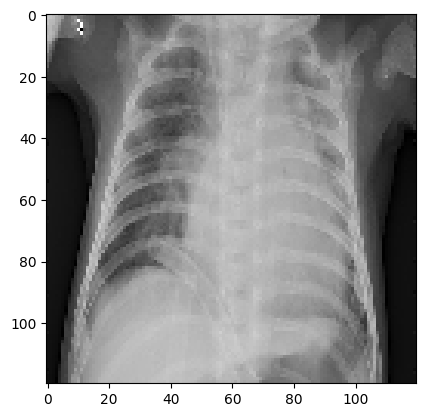

The percentage of pneumonia is: [99.98354]


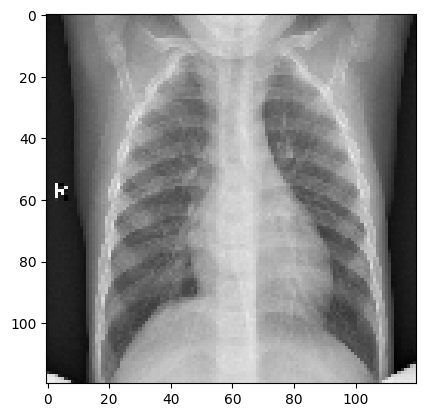

The percentage of pneumonia is: [66.70518]


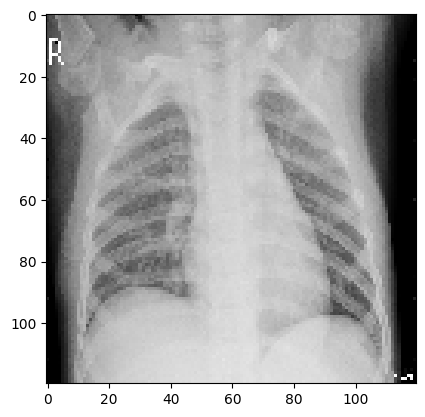

The percentage of pneumonia is: [94.72816]


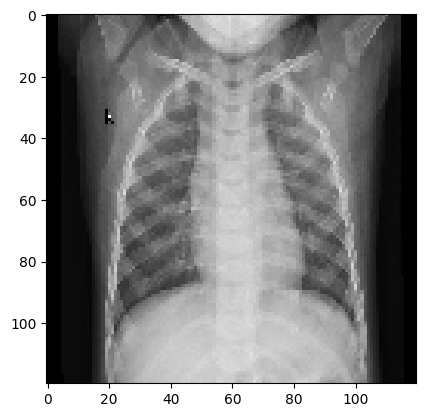

The percentage of pneumonia is: [8.99687]


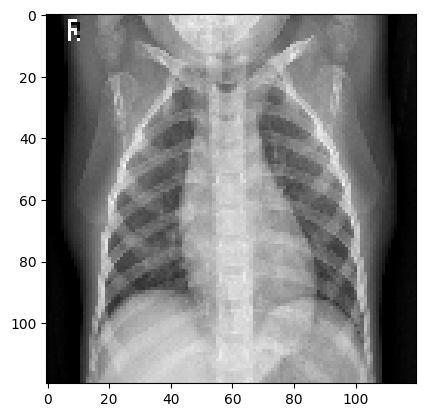

The percentage of pneumonia is: [15.205781]


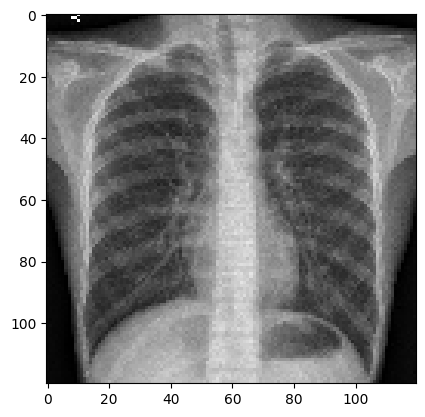

The percentage of pneumonia is: [47.27374]


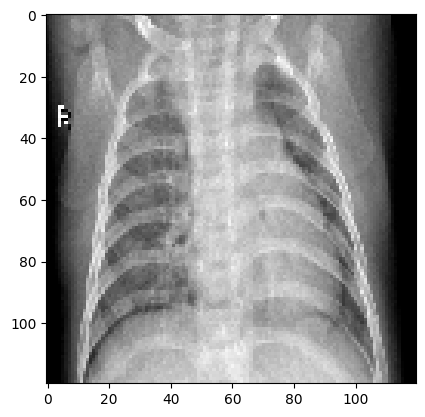

The percentage of pneumonia is: [41.281563]


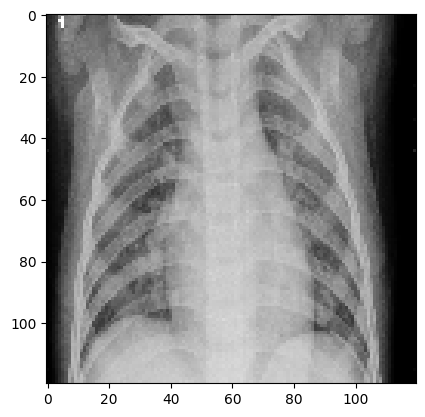

The percentage of pneumonia is: [91.08869]


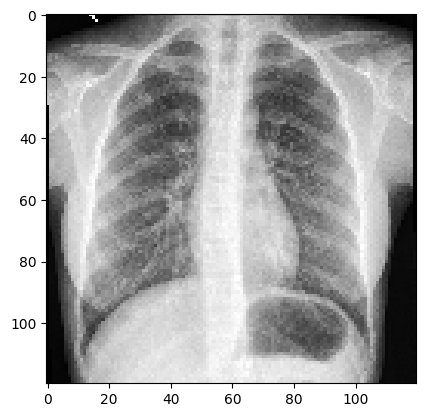

The percentage of pneumonia is: [46.10557]


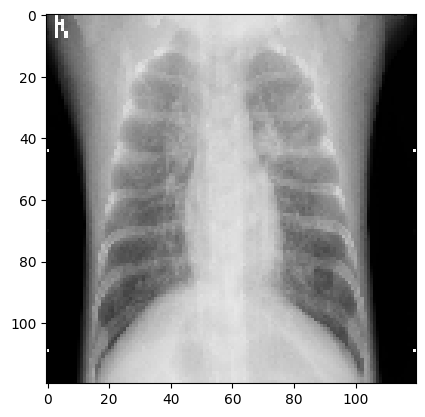

The percentage of pneumonia is: [99.907394]


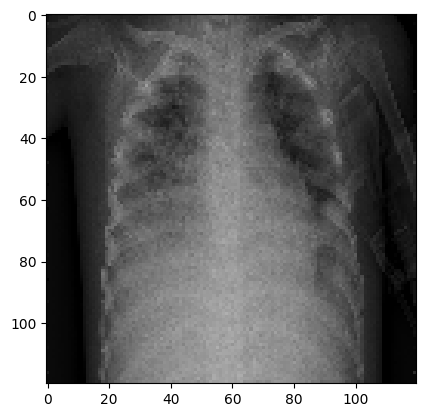

The percentage of pneumonia is: [98.821465]


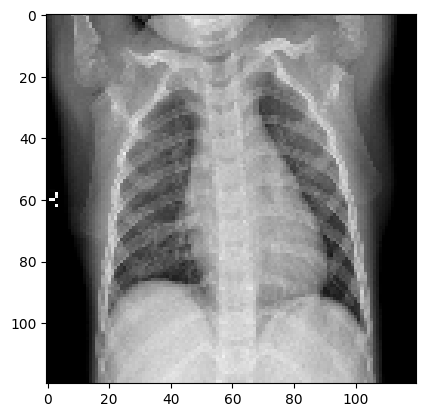

The percentage of pneumonia is: [4.5906773]


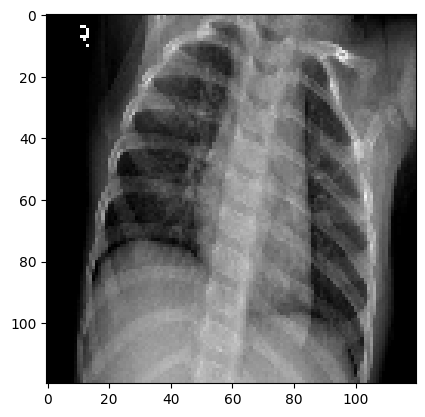

The percentage of pneumonia is: [92.478546]


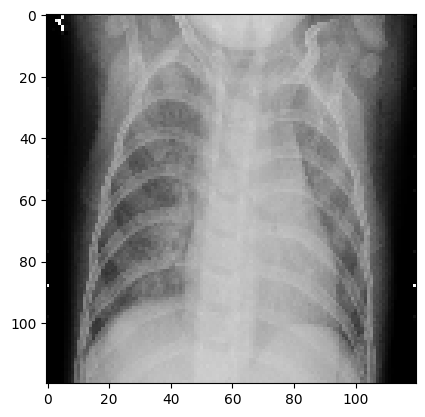

The percentage of pneumonia is: [99.73923]


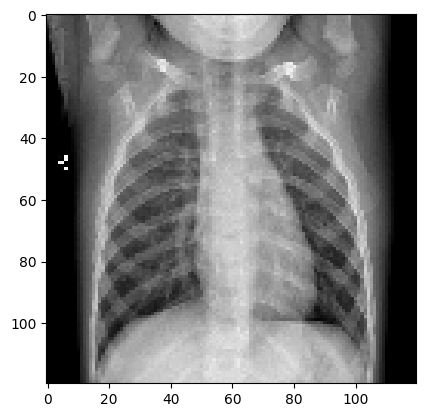

The percentage of pneumonia is: [3.9329216]


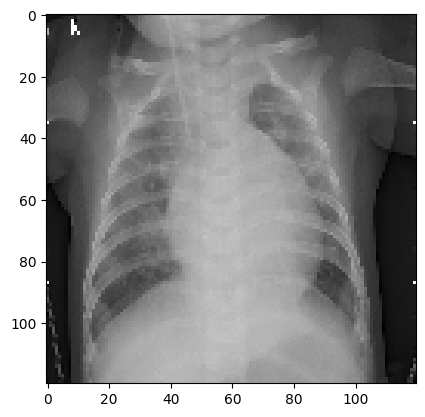

The percentage of pneumonia is: [98.39314]


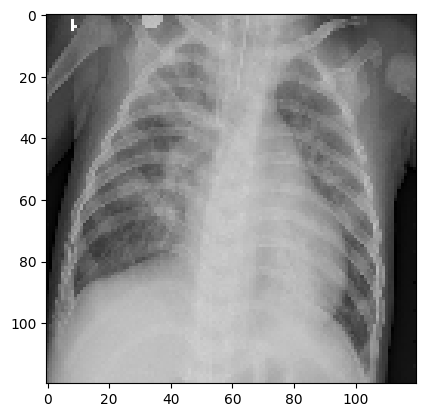

The percentage of pneumonia is: [99.85727]


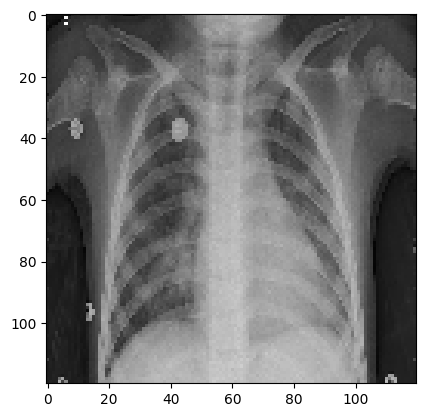

The percentage of pneumonia is: [75.94062]


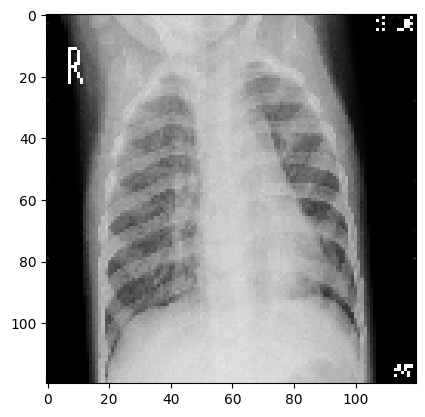

The percentage of pneumonia is: [99.57707]


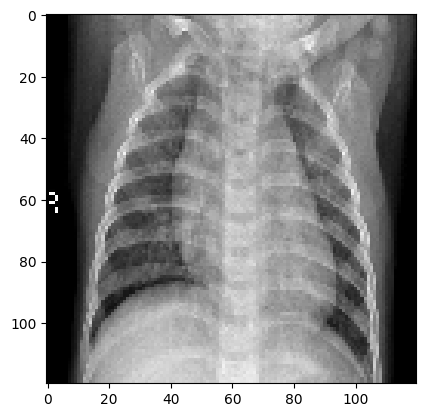

The percentage of pneumonia is: [65.45422]


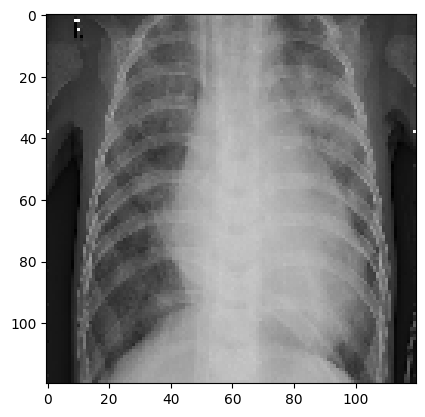

The percentage of pneumonia is: [99.85549]


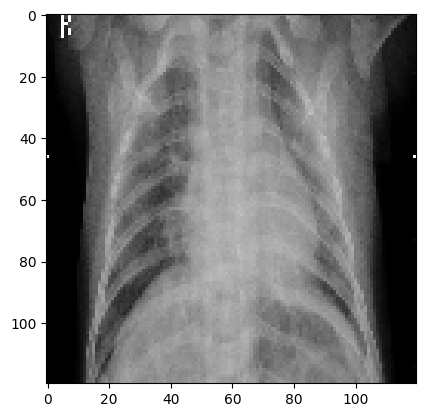

The percentage of pneumonia is: [98.29736]


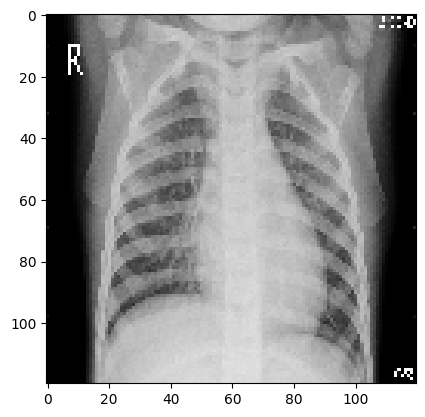

The percentage of pneumonia is: [54.268692]


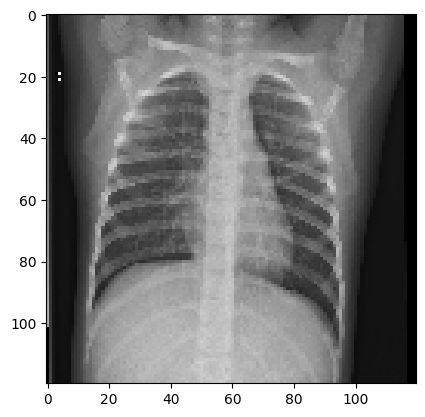

The percentage of pneumonia is: [34.29332]


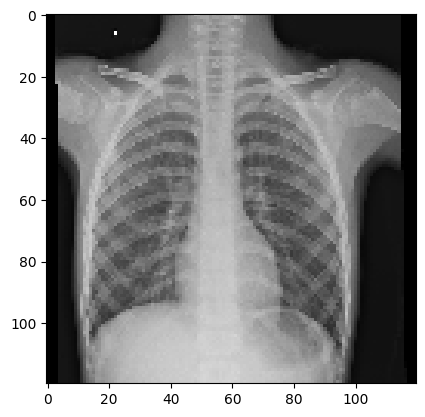

The percentage of pneumonia is: [23.925188]


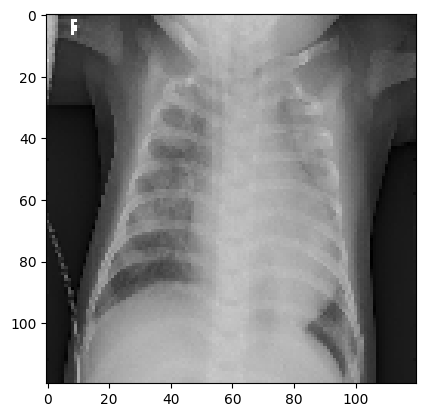

The percentage of pneumonia is: [99.91425]


In [26]:
for i in range(1):
    batch_x, batch_y = data_test[i]
    predictions = model.predict(batch_x)
    
    # Iterate over each image in the batch
    for j in range(len(batch_x)):
        plt.imshow(batch_x[j])
        plt.show()
        percentage=predictions[j]*100
        print("The percentage of pneumonia is:", percentage)